In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# !pip install tensorflow==2.0

In [ ]:
import tensorflow.keras.datasets as dset

In [ ]:
(train_x,train_y),(test_x,test_y)=dset.mnist.load_data()

In [ ]:
len(test_x[1].ravel())

784

In [ ]:
train_x.shape[0]

60000

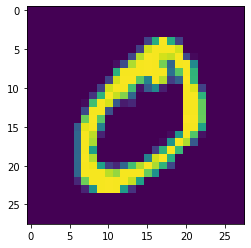

In [ ]:
plt.imshow(train_x[1])

In [ ]:
train_x = train_x.reshape(train_x.shape[0], 28, 28,1)
test_x = test_x.reshape(test_x.shape[0], 28, 28,1)

In [ ]:
train_x[1]

In [ ]:
input_shape = (28, 28,1)

train_x = train_x.astype('float32')
test_x = test_x.astype('float32')

train_x /= 255
train_x /= 255
train_x[1]

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [ ]:
    model = Sequential()
    model.add(Conv2D(6,kernel_size=(5,5),activation=tf.nn.relu,input_shape=input_shape))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(16,kernel_size=(5,5),activation=tf.nn.relu))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(120,activation=tf.nn.relu))
    model.add(Dense(84,activation=tf.nn.relu))
    model.add(Dense(10,activation=tf.nn.softmax))
    model.compile(optimizer=tf.keras.optimizers.Adam(),loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [ ]:
model.fit(train_x,train_y,epochs=20,batch_size=64)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 341us/sample - loss: 0.2487 - accuracy: 0.9241
Epoch 2/20
60000/60000 [==============================] - 20s 328us/sample - loss: 0.1653 - accuracy: 0.9501
Epoch 3/20
60000/60000 [==============================] - 20s 334us/sample - loss: 0.1300 - accuracy: 0.9601
Epoch 4/20
60000/60000 [==============================] - 20s 332us/sample - loss: 0.1072 - accuracy: 0.9671
Epoch 5/20
60000/60000 [==============================] - 20s 331us/sample - loss: 0.0895 - accuracy: 0.9719
Epoch 6/20
60000/60000 [==============================] - 20s 330us/sample - loss: 0.0791 - accuracy: 0.9758
Epoch 7/20
60000/60000 [==============================] - 20s 331us/sample - loss: 0.0699 - accuracy: 0.9781
Epoch 8/20
60000/60000 [==============================] - 20s 336us/sample - loss: 0.0629 - accuracy: 0.9806
Epoch 9/20
60000/60000 [==============================] - 20s 335us/sample - loss: 0.0555 - accuracy: 0.9

In [ ]:
model.evaluate(test_x,test_y)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2543.5573265625, 0.9845]

In [ ]:
pred_y = model.predict_classes(test_x)
pred_y

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(test_y,pred_y)

array([[ 973,    0,    0,    0,    0,    0,    4,    1,    2,    0],
       [   0, 1133,    0,    0,    0,    0,    0,    2,    0,    0],
       [   4,    8, 1006,    1,    1,    0,    0,   11,    1,    0],
       [   0,    1,    2,  998,    0,    2,    0,    6,    1,    0],
       [   0,    0,    0,    0,  982,    0,    0,    0,    0,    0],
       [   3,    0,    0,   11,    1,  870,    2,    1,    3,    1],
       [   3,    4,    0,    1,    4,    3,  943,    0,    0,    0],
       [   0,    1,    0,    1,    0,    0,    0, 1025,    1,    0],
       [   5,    0,    1,    9,    1,    0,    1,    9,  945,    3],
       [   1,    3,    0,    4,   14,    2,    0,   14,    1,  970]])

In [ ]:
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.97      0.99      1032
           3       0.97      0.99      0.98      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.96      1.00      0.98      1028
           8       0.99      0.97      0.98       974
           9       1.00      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
model.predict(test_x[1:2])

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
test_y[1:2]

array([2], dtype=uint8)

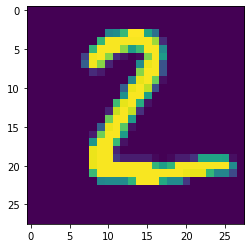

In [ ]:
plt.imshow(test_x[1:2].reshape(28,28))

In [ ]:
model.save("handwritten.h5")